## Machine Learning
### RBF network (with stochastic gradient descent)
The RBF network $F$ with a bias term $w_{K+1}$is expressed by:
<br> $\large F(\boldsymbol{x})=\sum_{k=1}^K w_k \phi_k(||\boldsymbol{x}-\boldsymbol{c}_k||)+w_{K+1}$  (1)
<br>where $\boldsymbol{c}_k$ are $K$ distinct center points. And $w_{K+1}$ is the bias term, which is considerdd as a part of the weight vector $\boldsymbol{w}=[w_1,w_2,...,w_K,w_{K+1}]^T$. Morover, we usually choose $\phi_k(r)=exp(-\frac{r^2}{2\sigma_k^2})$
<br> The loss function for a single training sample $(\boldsymbol{x}_i,yi)$ is defined by:
<br> $\large L_i=\frac{1}{2}(y_i-F(x_i))^2+\frac{1}{2}\lambda \sum_{k=1}^K w_k^2$
<br>Then, the gradient of $L_i$ with respect to weight $w_k$ is:
<br> $\large \frac{\partial L_i}{\partial w_k}=(y_i-F(\boldsymbol{x}_i))\phi_k(||\boldsymbol{x}_i-\boldsymbol{c}_k||)+\lambda w_k$ for $k=1,2,...,K$
<br> and for the bias term $w_{K+1}$
<br> $\large \frac{\partial L_i}{\partial w_{K+1}}=(y_i-F(\boldsymbol{x}_i))$
<br> Then, according tothe stochastic gradeint descent (SGD), we update weights by:
<br> $\large w_k\leftarrow w_k-\eta \frac{\partial L_i}{\partial w_k}$ for $k=1,2,...,K,K+1$
<hr>
Finally, we implement the RBF network with SGD (stochastic gradient descent) and bias term and regualarization without affecting the bias term.
<hr>
The Python code at: https://github.com/ostad-ai/Machine-Learning
<br> Explanation: https://www.pinterest.com/HamedShahHosseini/Machine-Learning/

In [1]:
# Import required modules
import numpy as np
from matplotlib import pyplot as plt
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans

In [2]:
# The RBF network with SGD+regulariztion and bias term
class RBFNetworkSGD:
    def __init__(self, n_centers=10, sigma=None, lambda_reg=0.01, learning_rate=0.01, epochs=100):
        """
        Parameters:
        - n_centers: Number of RBF neurons (int)
        - sigma: Width of RBFs (float). If None, computed automatically.
        - lambda_reg: L2 regularization strength (float)
        - learning_rate: SGD step size (float)
        - epochs: Number of training passes (int)
        """
        self.n_centers = n_centers
        self.sigma = sigma
        self.lambda_reg = lambda_reg
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.centers = None
        self.weights = None  # Includes bias as last element (w_K+1)
        self.loss_history = []

    def _rbf_activation(self, X):
        """Compute RBF activations (without bias term). Shape: (N, K)"""
        r = cdist(X, self.centers)
        return np.exp(-0.5 * (r ** 2) / (self.sigma ** 2))

    def fit(self, X, y):
        # Step 1: Initialize RBF centers using K-means
        kmeans = KMeans(n_clusters=self.n_centers,n_init='auto')
        kmeans.fit(X)
        self.centers = kmeans.cluster_centers_

        # Step 2: Set RBF width if not provided
        if self.sigma is None:
            D = cdist(self.centers, self.centers)
            np.fill_diagonal(D, np.inf)  # Ignore self-distance
            self.sigma = np.mean(np.min(D, axis=1))  # Avg dist to nearest center

        # Step 3: Initialize weights (including bias)
        self.weights = np.random.randn(self.n_centers + 1) * 0.01  # K weights + 1 bias

        # Step 4: SGD Training
        n_samples = len(X)     
        
        for epoch in range(self.epochs):
            epoch_loss = 0
            for i in range(n_samples):
                # Compute RBF activations for the current sample using _rbf_activation
                phi_i = self._rbf_activation(X[i].reshape(1, -1)).flatten()  # Shape: (K,)
                
                # Add bias term (1.0) to create extended activation vector
                phi_i_plus = np.append(phi_i, 1.0)  # Shape: (K + 1,)
                
                # Compute error
                error = np.dot(self.weights, phi_i_plus) - y[i]
                
                # Update weights (with L2 regularization excluding bias)
                self.weights -= self.learning_rate * (
                    error * phi_i_plus + self.lambda_reg * np.append(self.weights[:-1],0.))

                # Accumulate loss (MSE + L2)
                epoch_loss += 0.5 * error ** 2

            # Record average epoch loss
            epoch_loss = epoch_loss / n_samples + 0.5 * self.lambda_reg * np.sum(self.weights[:-1] ** 2)
            self.loss_history.append(epoch_loss)

            # Print progress
            if epoch % 10 == 0:
                print(f"Epoch {epoch:4d}, Loss: {epoch_loss:.4f}")

    def predict(self, X):
        """Predict outputs for new inputs."""
        # Compute RBF activations and add bias term
        phi = self._rbf_activation(X)
        phi_plus = np.column_stack([phi, np.ones(len(X))])  # Shape: (N, K + 1)
        return phi_plus @ self.weights

Epoch    0, Loss: 0.0692
Epoch   10, Loss: 0.0297
Epoch   20, Loss: 0.0295
Epoch   30, Loss: 0.0295
Epoch   40, Loss: 0.0295
Epoch   50, Loss: 0.0295
Epoch   60, Loss: 0.0295
Epoch   70, Loss: 0.0295
Epoch   80, Loss: 0.0295
Epoch   90, Loss: 0.0295
Epoch  100, Loss: 0.0295
Epoch  110, Loss: 0.0295
Epoch  120, Loss: 0.0295
Epoch  130, Loss: 0.0295
Epoch  140, Loss: 0.0295
Epoch  150, Loss: 0.0295
Epoch  160, Loss: 0.0295
Epoch  170, Loss: 0.0295
Epoch  180, Loss: 0.0295
Epoch  190, Loss: 0.0295


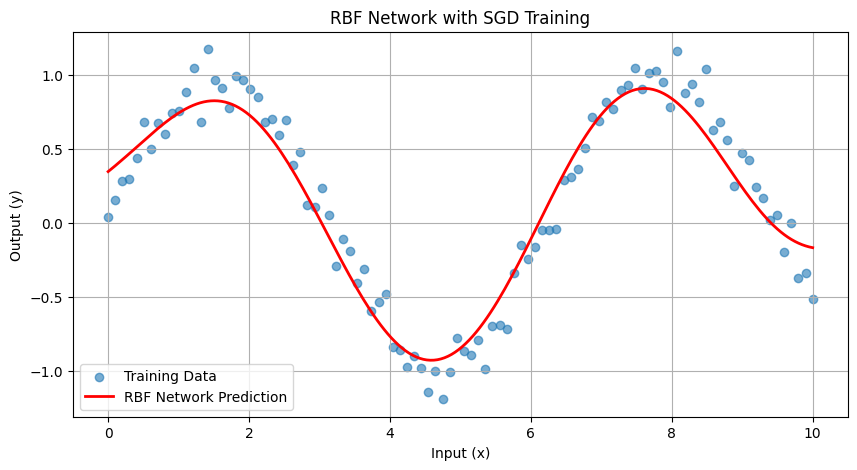

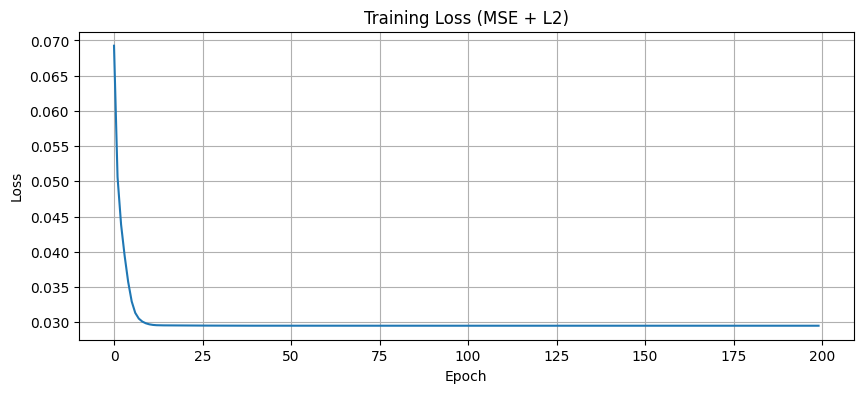

In [3]:
# Generate synthetic data
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = np.sin(X.flatten()) + 0.1 * np.random.randn(100)

# Initialize and train
model = RBFNetworkSGD(
    n_centers=10,
    sigma=None,
    lambda_reg=0.02,
    learning_rate=0.05,
    epochs=200,)

model.fit(X, y)

# Predictions
X_test = np.linspace(0, 10, 200).reshape(-1, 1)
y_pred = model.predict(X_test)

# Plot results
plt.figure(figsize=(10, 5))
plt.scatter(X, y, label="Training Data", alpha=0.6)
plt.plot(X_test, y_pred, 'r-', label="RBF Network Prediction", linewidth=2)
plt.title("RBF Network with SGD Training")
plt.xlabel("Input (x)")
plt.ylabel("Output (y)")
plt.legend()
plt.grid(True)
plt.show()

# Plot training loss
plt.figure(figsize=(10, 4))
plt.plot(model.loss_history)
plt.title("Training Loss (MSE + L2)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()